# Kmeans

## Using sklearn

In [1]:
from sklearn.datasets import make_blobs

# Make the datasets and return the center of each cluster
X, y, centers = make_blobs(n_samples=200, centers=4, cluster_std=2, return_centers=True)

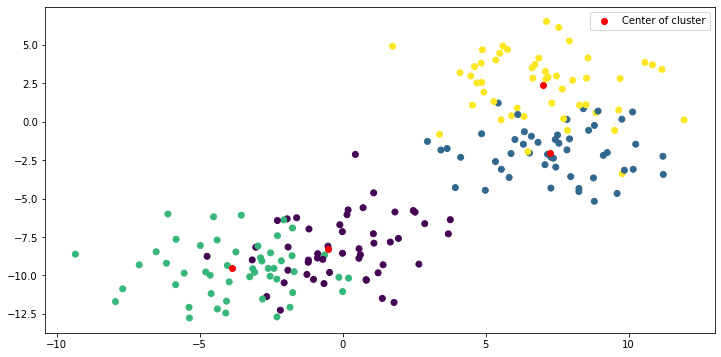

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(centers[:, 0], centers[:, 1], c="red", label="Center of cluster")
plt.legend()

In [3]:
from sklearn.cluster import KMeans

# There are no result due to the supervised learning
models = KMeans(n_clusters=4).fit(X)

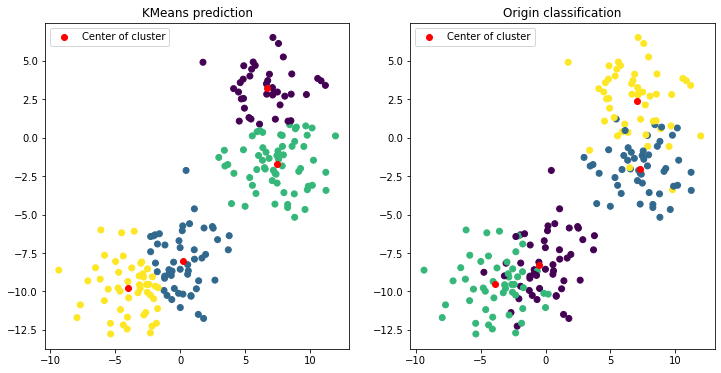

In [4]:
# See the result of kmeans
predict_labels = models.predict(X)
predict_centers = models.cluster_centers_


plt.figure(figsize=(12, 6))

# Plot the prediction
plt.subplot(1, 2, 1)
plt.title("KMeans prediction")
plt.scatter(X[:, 0], X[:, 1], c=predict_labels)
plt.scatter(predict_centers[:, 0], predict_centers[:, 1], c="red", label="Center of cluster")
plt.legend()

# Plot the original dataset
plt.subplot(1, 2, 2)
plt.title("Origin classification")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(centers[:, 0], centers[:, 1], c="red", label="Center of cluster")
plt.legend()

In [5]:
# Predict different number of clusters

num_clus = [3, 5, 6]
kmean_models = []

for num in num_clus:
    temp_model = KMeans(n_clusters=num).fit(X)
    kmean_models.append(temp_model)

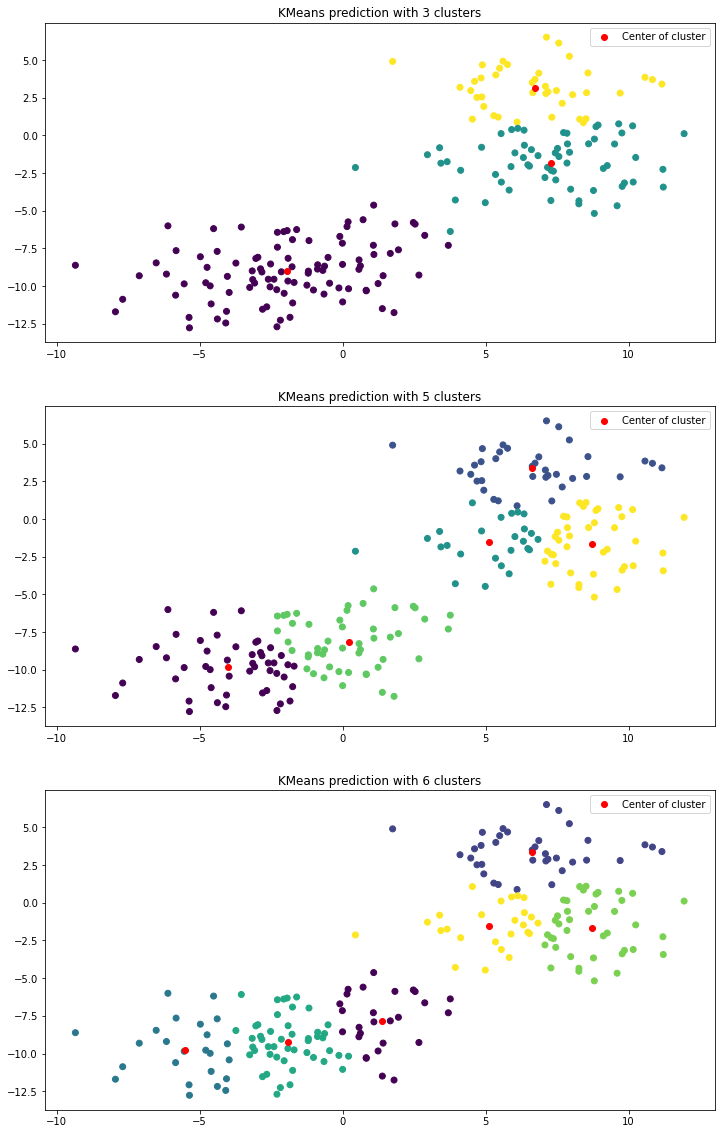

In [6]:
# Plot the prediction
plt.figure(figsize=(12, 20))
for index, model in enumerate(kmean_models):
    # Result of kmeans
    predict_labels = model.predict(X)
    predict_centers = model.cluster_centers_
    
    # Plot the prediction
    plt.subplot(len(num_clus), 1, index+1)
    plt.title(f"KMeans prediction with {num_clus[index]} clusters")
    plt.scatter(X[:, 0], X[:, 1], c=predict_labels)
    plt.scatter(predict_centers[:, 0], predict_centers[:, 1], c="red", label="Center of cluster")
    plt.legend()

## Our own KMeans

In [7]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters):
    # Randomly choose clusters from origin datasets
    point_index = np.random.randint(low=0, high=X.shape[0] - 1, size=n_clusters)
    centers = X[point_index]
    
    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(axis=0)
                                for i in range(n_clusters)])
        
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

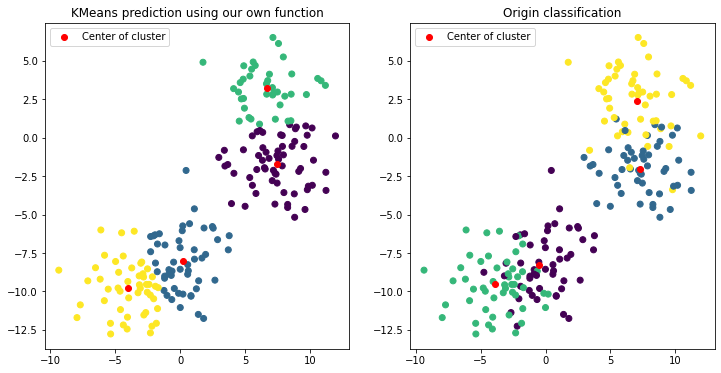

In [8]:
# Predict the cluster using our own kmeans
predict_centers, predict_labels = find_clusters(X, 4)

plt.figure(figsize=(12, 6))

# Plot our own kmeans-function
plt.subplot(1, 2, 1)
plt.title(f"KMeans prediction using our own function")
plt.scatter(X[:, 0], X[:, 1], c=predict_labels)
plt.scatter(predict_centers[:, 0], predict_centers[:, 1], c="red", label="Center of cluster")
plt.legend()

# Plot the original dataset
plt.subplot(1, 2, 2)
plt.title("Origin classification")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(centers[:, 0], centers[:, 1], c="red", label="Center of cluster")
plt.legend()